In [75]:
import pandas as pd

file_path = "/Users/wenjing/Downloads/Capstone/9_stocks_filtered_scored_single_date.csv"
fn = pd.read_csv(file_path)
len(df)

9477

In [81]:
stock_symbol_counts = fn['Stock_symbol'].value_counts()

# Display the result
print(stock_symbol_counts)

Stock_symbol
MRK     2756
AMD     2035
INTC    1822
GOOG    1685
BA      1157
NVDA     811
MSFT     594
TSLA     588
AAPL     558
Name: count, dtype: int64


In [82]:
fn.head()

,Date,Stock_symbol,sentiment_label,sentiment_score
0,2009-11-04,MRK,neutral,0.750418
1,2009-11-30,MRK,neutral,0.946103
2,2009-12-02,MRK,neutral,0.567485
3,2009-12-03,MRK,neutral,0.846016
4,2009-12-06,MRK,neutral,0.843107


In [6]:
stocks = ['AMD', 'NVDA', 'TSLA', 'AAPL', 'BA', 'MSFT', 'GOOG', 'INTC', 'MRK']


In [79]:
# Initialize an empty list to store individual DataFrames
df_list = []

# Iterate through each stock symbol and read the corresponding CSV file
for stock in stocks:
    file_path = f'/Users/wenjing/Downloads/Capstone/full_history/{stock}.csv'
    
    # Read the CSV file and add a new column for Stock_symbol
    df = pd.read_csv(file_path)
    df['Stock_symbol'] = stock  # Add the stock symbol as a new column
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into one
df_combined = pd.concat(df_list, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(df_combined.head())

         date        open        high         low       close   adj close  \
0  2023-12-28  146.800003  150.410004  145.949997  148.759995  148.759995   
1  2023-12-27  144.720001  146.250000  143.179993  146.070007  146.070007   
2  2023-12-26  140.070007  143.850006  139.919998  143.410004  143.410004   
3  2023-12-22  140.479996  140.699997  138.309998  139.600006  139.600006   
4  2023-12-21  138.139999  139.979996  137.380005  139.910004  139.910004   

     volume Stock_symbol  
0  63661900          AMD  
1  49033400          AMD  
2  47157400          AMD  
3  35370400          AMD  
4  47179400          AMD  


In [80]:
len(df_combined)

86229

In [83]:
# Filter rows where 'close' is not equal to 'adj close'
df_filtered = df_combined[df_combined['close'] != df_combined['adj close']]

# Display the filtered DataFrame
print(df_filtered)


             date        open        high         low       close   adj close  \
11057  2023-12-04  460.769989  460.769989  450.100006  455.100006  455.059998   
11058  2023-12-01  465.250000  472.000000  461.869995  467.649994  467.608887   
11059  2023-11-30  480.239990  481.100006  464.220001  467.700012  467.658905   
11060  2023-11-29  483.790009  487.619995  478.600006  481.399994  481.357666   
11061  2023-11-28  482.359985  483.230011  474.730011  478.209991  478.167938   
...           ...         ...         ...         ...         ...         ...   
86224  1970-01-08    1.538194    1.555556    1.538194    1.545139    0.352593   
86225  1970-01-07    1.548611    1.562500    1.531250    1.534722    0.350216   
86226  1970-01-06    1.536458    1.548611    1.527778    1.548611    0.353385   
86227  1970-01-05    1.545139    1.555556    1.531250    1.536458    0.350612   
86228  1970-01-02    1.565972    1.565972    1.541667    1.545139    0.352593   

         volume Stock_symbo

In [84]:
# Make a copy of the original DataFrame to avoid modifying it directly
df_copy = df_combined.copy()

# Create a new column 'diff' in the copied DataFrame to store the difference between 'close' and 'adj close'
df_copy['diff'] = df_copy['close'] - df_copy['adj close']

# Filter rows where 'close' is not equal to 'adj close'
df_filtered = df_copy[df_copy['close'] != df_copy['adj close']]

# Sort the DataFrame by the 'diff' column in descending order
df_sorted = df_filtered.sort_values(by='diff', ascending=False)

# Display the sorted DataFrame
print(df_sorted.head(20))


             date     open     high      low    close  adj close    volume  \
78416  2000-11-29  93.0000  95.1875  93.0000  94.8750  44.702278   8328000   
78396  2000-12-28  93.6250  94.7500  93.4375  94.7500  44.812687   3131600   
78395  2000-12-29  95.0000  95.9375  93.4375  93.6250  44.280602   3737100   
78401  2000-12-20  93.0000  95.1250  92.4375  93.3750  44.162361   9651900   
78415  2000-11-30  95.7500  96.6875  92.2500  92.6875  43.671581   9125500   
78394  2001-01-02  93.3750  95.2500  92.5000  93.0000  43.984997   6042900   
78417  2000-11-28  91.9375  92.9375  91.3125  92.6250  43.642132   5120300   
78398  2000-12-26  90.8750  93.2500  90.4375  92.6875  43.837193   3636300   
78397  2000-12-27  92.7500  94.6875  92.6250  92.6875  43.837193   5028300   
78400  2000-12-21  93.0000  93.6250  91.0000  92.5000  43.748524   7347300   
78421  2000-11-21  90.9375  92.1875  90.7500  92.0000  43.347664   5417200   
78413  2000-12-04  88.5000  92.9375  88.5000  91.9375  43.318214

In [85]:
# Select only the specified columns
df_selected = df_combined[['date', 'open', 'close', 'volume', 'Stock_symbol']]

# Display the selected columns
print(df_selected.head())


         date        open       close    volume Stock_symbol
0  2023-12-28  146.800003  148.759995  63661900          AMD
1  2023-12-27  144.720001  146.070007  49033400          AMD
2  2023-12-26  140.070007  143.410004  47157400          AMD
3  2023-12-22  140.479996  139.600006  35370400          AMD
4  2023-12-21  138.139999  139.910004  47179400          AMD


In [86]:
import pandas as pd

# Ensure 'Date' and 'date' columns are in the same format (e.g., strings)
fn['Date'] = pd.to_datetime(fn['Date']).dt.date
df_selected['date'] = pd.to_datetime(df_selected['date']).dt.date

# Merge the two DataFrames based on 'Date' (fn) and 'date' (df_selected), and 'Stock_symbol'
df_combined = pd.merge(df_selected, fn, left_on=['date', 'Stock_symbol'], right_on=['Date', 'Stock_symbol'], how='inner')

# Drop the duplicate 'Date' column (if you want to keep 'date' only)
df_combined = df_combined.drop(columns=['Date'])

# Display the merged DataFrame
print(df_combined.head())


         date        open       close    volume Stock_symbol sentiment_label  \
0  2023-12-28  146.800003  148.759995  63661900          AMD         neutral   
1  2023-12-27  144.720001  146.070007  49033400          AMD         neutral   
2  2023-12-26  140.070007  143.410004  47157400          AMD         neutral   
3  2023-12-22  140.479996  139.600006  35370400          AMD        positive   
4  2023-12-21  138.139999  139.910004  47179400          AMD         neutral   

   sentiment_score  
0         0.901703  
1         0.836227  
2         0.841132  
3         0.809862  
4         0.890208  


/var/folders/z8/1bf58b0x31xb_r9dnkm4w93c0000gn/T/ipykernel_29489/54560207.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['date'] = pd.to_datetime(df_selected['date']).dt.date


In [87]:
# Assuming df is your DataFrame
output_file = "/Users/wenjing/Downloads/Capstone/combined_data_price.csv"

# Export the DataFrame to a CSV file
df_combined.to_csv(output_file, index=False)

In [88]:
len(df_combined)

9477

In [93]:
df_combined['return'] = (df_combined['close'] - df_combined['open']) / df_combined['open']

# Display the DataFrame with the new 'return' column
print(df_combined.head(50))

          date        open       close     volume Stock_symbol  \
0   2023-12-28  146.800003  148.759995   63661900          AMD   
1   2023-12-27  144.720001  146.070007   49033400          AMD   
2   2023-12-26  140.070007  143.410004   47157400          AMD   
3   2023-12-22  140.479996  139.600006   35370400          AMD   
4   2023-12-21  138.139999  139.910004   47179400          AMD   
5   2023-12-20  139.000000  135.470001   54671700          AMD   
6   2023-12-19  138.570007  140.149994   63739800          AMD   
7   2023-12-18  139.149994  138.899994   45199500          AMD   
8   2023-12-15  139.520004  139.149994   70178600          AMD   
9   2023-12-14  138.889999  138.000000   76115200          AMD   
10  2023-12-13  137.970001  138.190002   70651600          AMD   
11  2023-12-12  132.250000  137.610001  111677800          AMD   
12  2023-12-11  130.559998  134.410004   98668300          AMD   
13  2023-12-08  129.539993  128.919998   89273900          AMD   
14  2023-1

In [94]:
import pandas as pd


# Add a new column 'movement' based on the value of 'return'
df_combined['movement'] = df_combined['return'].apply(lambda x: 'up' if x > 0 else 'down')

# Display the DataFrame with the new 'return' and 'movement' columns
print(df_combined.head(50))


          date        open       close     volume Stock_symbol  \
0   2023-12-28  146.800003  148.759995   63661900          AMD   
1   2023-12-27  144.720001  146.070007   49033400          AMD   
2   2023-12-26  140.070007  143.410004   47157400          AMD   
3   2023-12-22  140.479996  139.600006   35370400          AMD   
4   2023-12-21  138.139999  139.910004   47179400          AMD   
5   2023-12-20  139.000000  135.470001   54671700          AMD   
6   2023-12-19  138.570007  140.149994   63739800          AMD   
7   2023-12-18  139.149994  138.899994   45199500          AMD   
8   2023-12-15  139.520004  139.149994   70178600          AMD   
9   2023-12-14  138.889999  138.000000   76115200          AMD   
10  2023-12-13  137.970001  138.190002   70651600          AMD   
11  2023-12-12  132.250000  137.610001  111677800          AMD   
12  2023-12-11  130.559998  134.410004   98668300          AMD   
13  2023-12-08  129.539993  128.919998   89273900          AMD   
14  2023-1

In [96]:
# Save df_combined to a CSV file
df_combined.to_csv("/Users/wenjing/Downloads/Capstone/df_combined_with_return.csv", index=False)


In [97]:
# List of stock symbols
stocks = ['AMD', 'NVDA', 'TSLA', 'AAPL', 'BA', 'MSFT', 'GOOG', 'INTC', 'MRK']

# Loop through each stock symbol and save the filtered, sorted data into a CSV file
for stock in stocks:
    # Filter the DataFrame for the current stock
    df_stock = df_combined[df_combined['Stock_symbol'] == stock]
    
    # Sort the DataFrame by date
    df_stock = df_stock.sort_values(by='date')
    
    # Define the filename based on the stock symbol
    filename = f"/Users/wenjing/Downloads/Capstone/individual_stock/combined_data_{stock}.csv"
    
    # Save the sorted DataFrame to a CSV file
    df_stock.to_csv(filename, index=False)
    
    print(f"Saved {filename}")


Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_AMD.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_NVDA.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_TSLA.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_AAPL.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_BA.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_MSFT.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_GOOG.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_INTC.csv
Saved /Users/wenjing/Downloads/Capstone/individual_stock/combined_data_MRK.csv


In [99]:
import pandas as pd
from pandas.tseries.offsets import BDay

# List of stock symbols
stocks = ['AMD', 'NVDA', 'TSLA', 'AAPL', 'BA', 'MSFT', 'GOOG', 'INTC', 'MRK']

# Loop through each stock's CSV file
for stock in stocks:
    # Load each CSV file
    file_path = f"/Users/wenjing/Downloads/Capstone/individual_stock/combined_data_{stock}.csv"
    df_stock = pd.read_csv(file_path)
    
    # Convert 'date' column to datetime
    df_stock['date'] = pd.to_datetime(df_stock['date'])
    
    # Determine start and end dates based on the actual data in the DataFrame
    start_date = df_stock['date'].min()
    end_date = df_stock['date'].max()
    
    # Generate all business days within the date range
    business_days = pd.date_range(start=start_date, end=end_date, freq='B')
    
    # Print the length of the DataFrame
    print(f"Length of df_{stock}: {len(df_stock)}")

    # Calculate missing business days
    stock_dates = pd.to_datetime(df_stock['date'].unique())
    missing_dates = business_days.difference(stock_dates)
    
    # Print the number of missing business entries
    print(f"Missing business entries for {stock}: {len(missing_dates)}")


Length of df_AMD: 1678
Missing business entries for AMD: 161
Length of df_NVDA: 585
Missing business entries for NVDA: 24
Length of df_TSLA: 410
Missing business entries for TSLA: 15
Length of df_AAPL: 387
Missing business entries for AAPL: 14
Length of df_BA: 916
Missing business entries for BA: 535
Length of df_MSFT: 414
Missing business entries for MSFT: 15
Length of df_GOOG: 1211
Missing business entries for GOOG: 57
Length of df_INTC: 1463
Missing business entries for INTC: 96
Length of df_MRK: 2413
Missing business entries for MRK: 1269


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def compare_models(df):
    # Step 1: Preprocessing the data
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    # Ensure the year, month, and day columns are integers
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)

    # Encode categorical columns
    label_encoder = LabelEncoder()
    df['Stock_symbol'] = label_encoder.fit_transform(df['Stock_symbol'])
    df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])

    # Define feature sets
    # 1. Base features without sentiment or date columns
    X_base = df.drop(columns=['close', 'sentiment_label', 'sentiment_score', 'date', 'year', 'month', 'day'])

    # 2. Features with sentiment columns, but without date
    X_with_sentiment = df.drop(columns=['close', 'date', 'year', 'month', 'day'])

    # 3. Features with date but without sentiment
    X_with_date = df.drop(columns=['close', 'sentiment_label', 'sentiment_score', 'date'])

    # 4. Features with both date and sentiment columns
    X_full = df.drop(columns=['close', 'date'])

    # Target variable
    y = df['close']

    # Split data into training and testing sets (80% train, 20% test)
    X_train_base, X_test_base, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
    X_train_with_sentiment, X_test_with_sentiment = train_test_split(X_with_sentiment, test_size=0.2, random_state=42)[0:2]
    X_train_with_date, X_test_with_date = train_test_split(X_with_date, test_size=0.2, random_state=42)[0:2]
    X_train_full, X_test_full = train_test_split(X_full, test_size=0.2, random_state=42)[0:2]

    # Define models to compare, including XGBoost and a Neural Network
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "LinearRegression": LinearRegression(),
        "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42),
        "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
        "NeuralNetwork": None  # Placeholder for the neural network
    }

    # Define a function to build a neural network model
    def build_neural_network(input_shape):
        model = Sequential()
        model.add(Dense(64, input_dim=input_shape, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='linear'))  # Single output for regression
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model

    # Helper function to train and evaluate a model
    def evaluate_model(model, X_train, X_test, y_train, y_test, is_neural_net=False):
        if is_neural_net:
            model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Neural network training
            y_pred = model.predict(X_test)
        else:
            model.fit(X_train, y_train)  # Traditional ML models
            y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        return mse

    # Compare models without sentiment features
    print("Model Comparison without Sentiment and Date Features:")
    for name, model in models.items():
        if name == "NeuralNetwork":
            model = build_neural_network(X_train_base.shape[1])
            mse = evaluate_model(model, X_train_base, X_test_base, y_train, y_test, is_neural_net=True)
        else:
            mse = evaluate_model(model, X_train_base, X_test_base, y_train, y_test)
        print(f"{name}: MSE = {mse}")

    # Compare models with sentiment features but without date
    print("\nModel Comparison with Sentiment but without Date Features:")
    for name, model in models.items():
        if name == "NeuralNetwork":
            model = build_neural_network(X_train_with_sentiment.shape[1])
            mse = evaluate_model(model, X_train_with_sentiment, X_test_with_sentiment, y_train, y_test, is_neural_net=True)
        else:
            mse = evaluate_model(model, X_train_with_sentiment, X_test_with_sentiment, y_train, y_test)
        print(f"{name}: MSE = {mse}")

    # Compare models with date but without sentiment features
    print("\nModel Comparison with Date but without Sentiment Features:")
    for name, model in models.items():
        if name == "NeuralNetwork":
            model = build_neural_network(X_train_with_date.shape[1])
            mse = evaluate_model(model, X_train_with_date, X_test_with_date, y_train, y_test, is_neural_net=True)
        else:
            mse = evaluate_model(model, X_train_with_date, X_test_with_date, y_train, y_test)
        print(f"{name}: MSE = {mse}")

    # Compare models with both sentiment and date features
    print("\nModel Comparison with both Date and Sentiment Features:")
    for name, model in models.items():
        if name == "NeuralNetwork":
            model = build_neural_network(X_train_full.shape[1])
            mse = evaluate_model(model, X_train_full, X_test_full, y_train, y_test, is_neural_net=True)
        else:
            mse = evaluate_model(model, X_train_full, X_test_full, y_train, y_test)
        print(f"{name}: MSE = {mse}")

# Example of usage
compare_models(df_combined)


Model Comparison without Sentiment and Date Features:
RandomForest: MSE = 22.80909217106626
LinearRegression: MSE = 18.090942223528018
AdaBoost: MSE = 346.0225839126405
XGBoost: MSE = 169.57237169263684


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
NeuralNetwork: MSE = 1209007.4462036982

Model Comparison with Sentiment but without Date Features:
RandomForest: MSE = 22.332711122902413
LinearRegression: MSE = 17.906145299472378
AdaBoost: MSE = 361.4555948971907
XGBoost: MSE = 185.4045869451296


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step
NeuralNetwork: MSE = 60502.85180705502

Model Comparison with Date but without Sentiment Features:
RandomForest: MSE = 21.355310465487282
LinearRegression: MSE = 18.103368065737463
AdaBoost: MSE = 333.9510771966754
XGBoost: MSE = 173.37367920072154


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step
NeuralNetwork: MSE = 2680515726.5906987

Model Comparison with both Date and Sentiment Features:
RandomForest: MSE = 21.315870422903963
LinearRegression: MSE = 17.91824600699988
AdaBoost: MSE = 333.2765499828182
XGBoost: MSE = 174.7147489029307


/Users/wenjing/miniforge3/envs/w210/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
NeuralNetwork: MSE = 312494045.95917976


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def z_score_normalize(series):
    return (series - series.mean()) / series.std()

def reverse_z_score_normalize(y_pred, original_series):
    mean = original_series.mean()
    std = original_series.std()
    return y_pred * std + mean

def compare_models(df):
    # Step 1: Preprocessing the data
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    
    # Ensure the year, month, and day columns are integers
    df['year'] = df['year'].astype(int)
    df['month'] = df['month'].astype(int)
    df['day'] = df['day'].astype(int)

    # Normalize 'open' and 'close' prices using Z-Score normalization
    df['open_normalized'] = z_score_normalize(df['open'])
    df['close_normalized'] = z_score_normalize(df['close'])
    
    original_close = df['close'].copy()

    # Encode categorical columns
    label_encoder = LabelEncoder()
    df['Stock_symbol'] = label_encoder.fit_transform(df['Stock_symbol'])
    df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])

    # Define feature sets (using normalized open and close prices)
    X_base = df.drop(columns=['close', 'close_normalized', 'sentiment_label', 'sentiment_score', 'date', 'year', 'month', 'day'])
    X_with_sentiment = df.drop(columns=['close', 'close_normalized', 'date', 'year', 'month', 'day'])
    X_with_date = df.drop(columns=['close', 'close_normalized', 'sentiment_label', 'sentiment_score', 'date'])
    X_full = df.drop(columns=['close', 'close_normalized', 'date'])

    # Target variable for exact normalized close price
    y = df['close_normalized']
    
    # Binary target variable for price direction (1 if close > open, 0 otherwise)
    df['price_direction'] = (df['close'] > df['open']).astype(int)
    y_direction = df['price_direction']

    # Split data into training and testing sets (80% train, 20% test)
    X_train_base, X_test_base, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
    X_train_with_sentiment, X_test_with_sentiment = train_test_split(X_with_sentiment, test_size=0.2, random_state=42)[0:2]
    X_train_with_date, X_test_with_date = train_test_split(X_with_date, test_size=0.2, random_state=42)[0:2]
    X_train_full, X_test_full = train_test_split(X_full, test_size=0.2, random_state=42)[0:2]
    print(X_train_base.head())

    # Binary direction split
    X_train_base_dir, X_test_base_dir, y_train_dir, y_test_dir = train_test_split(X_base, y_direction, test_size=0.2, random_state=42)
    X_train_with_sentiment_dir, X_test_with_sentiment_dir = train_test_split(X_with_sentiment, y_direction, test_size=0.2, random_state=42)[0:2]
    X_train_with_date_dir, X_test_with_date_dir = train_test_split(X_with_date, y_direction, test_size=0.2, random_state=42)[0:2]
    X_train_full_dir, X_test_full_dir = train_test_split(X_full, y_direction, test_size=0.2, random_state=42)[0:2]
    
    # Define models to compare, including XGBoost and a Neural Network
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "LinearRegression": LinearRegression()
    }

    # Helper function to train and evaluate a model for exact price prediction
    def evaluate_model(model, X_train, X_test, y_train, y_test, original_close):
        model.fit(X_train, y_train)  # Traditional ML models
        y_pred = model.predict(X_test)
        
        # Convert y_pred back to the original (non-normalized) prices
        y_pred_original = reverse_z_score_normalize(y_pred, original_close)

        print("\nPredicted vs Actual (10 examples):")
        for i in range(10):
            print(f"Predicted: {y_pred_original[i]:.2f}, Actual: {original_close.iloc[i]:.2f}")
        
        mse = mean_squared_error(original_close.iloc[y_test.index], y_pred_original)

        return mse

    # Helper function to train and evaluate for price direction (up/down)
    def evaluate_direction(model, X_train, X_test, y_train, y_test, is_neural_net=False):
        model.fit(X_train, y_train)
        y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert to binary (0 or 1)
        accuracy = accuracy_score(y_test, y_pred)
        
        return accuracy

    # Compare models without sentiment features
    print("Model Comparison without Sentiment and Date Features (Exact Price Prediction and Price Direction):")
    for name, model in models.items():
        mse = evaluate_model(model, X_train_base, X_test_base, y_train, y_test, original_close)
        accuracy = evaluate_direction(model, X_train_base_dir, X_test_base_dir, y_train_dir, y_test_dir)
        print(f"{name}: MSE = {mse}, Accuracy (Up/Down) = {accuracy}")

    # Model Comparison with Sentiment but without Date Features
    print("\nModel Comparison with Sentiment but without Date Features (Exact Price Prediction and Price Direction):")
    for name, model in models.items():
        mse = evaluate_model(model, X_train_with_sentiment, X_test_with_sentiment, y_train, y_test, original_close)
        accuracy = evaluate_direction(model, X_train_with_sentiment_dir, X_test_with_sentiment_dir, y_train_dir, y_test_dir)
        print(f"{name}: MSE = {mse}, Accuracy (Up/Down) = {accuracy}")

    # Model Comparison with Date but without Sentiment Features
    print("\nModel Comparison with Date but without Sentiment Features (Exact Price Prediction and Price Direction):")
    for name, model in models.items():
        mse = evaluate_model(model, X_train_with_date, X_test_with_date, y_train, y_test, original_close)
        accuracy = evaluate_direction(model, X_train_with_date_dir, X_test_with_date_dir, y_train_dir, y_test_dir)
        print(f"{name}: MSE = {mse}, Accuracy (Up/Down) = {accuracy}")

    # Model Comparison with both Date and Sentiment Features
    print("\nModel Comparison with both Date and Sentiment Features (Exact Price Prediction and Price Direction):")
    for name, model in models.items():
        mse = evaluate_model(model, X_train_with_date, X_test_with_date, y_train, y_test, original_close)            
        accuracy = evaluate_direction(model, X_train_with_date_dir, X_test_with_date_dir, y_train_dir, y_test_dir)
        print(f"{name}: MSE = {mse}, Accuracy (Up/Down) = {accuracy}")
        
        
compare_models(df_combined)


            open    volume  Stock_symbol  price_direction  open_normalized
4353  245.979996  33169200             6                0         0.352010
8341   60.950001  12247500             5                1        -0.434259
9013   57.950001  14066100             5                0        -0.447007
2574  308.290009  62555700             8                0         0.616791
2620  244.936661  82537500             8                0         0.347577
Model Comparison without Sentiment and Date Features (Exact Price Prediction and Price Direction):

Predicted vs Actual (10 examples):
Predicted: 255.28, Actual: 148.76
Predicted: 74.08, Actual: 146.07
Predicted: 91.84, Actual: 143.41
Predicted: 34.16, Actual: 139.60
Predicted: 239.09, Actual: 139.91
Predicted: 20.13, Actual: 135.47
Predicted: 300.26, Actual: 140.15
Predicted: 56.88, Actual: 138.90
Predicted: 109.19, Actual: 139.15
Predicted: 489.49, Actual: 138.00
RandomForest: MSE = 12.859889955620364, Accuracy (Up/Down) = 1.0

Predicted vs A

In [74]:
def z_score_normalize(series):
    """ Z-score normalize the given series """
    return (series - series.mean()) / series.std()

def reverse_z_score_normalize(y_pred, mean, std):
    """ Reverse the Z-score normalization using mean and std """
    return y_pred * std + mean

def compare_models(df):
    # Step 1: Preprocessing the data
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # Normalize 'open' and 'close' prices using Z-Score normalization
    df['open_normalized'] = z_score_normalize(df['open'])
    df['close_normalized'] = z_score_normalize(df['close'])

    # Encode categorical columns
    label_encoder = LabelEncoder()
    
    df['Stock_symbol'] = label_encoder.fit_transform(df['Stock_symbol'])
    df['sentiment_label'] = label_encoder.fit_transform(df['sentiment_label'])
    df['Stock_symbol_decoded'] = label_encoder.inverse_transform(df['Stock_symbol'])

    # Define feature sets (using normalized open prices)
    X_base = df.drop(columns=['close', 'close_normalized', 'sentiment_label', 'sentiment_score', 'date', 'year', 'month', 'day'])
    X_with_sentiment = df.drop(columns=['close', 'close_normalized', 'date', 'year', 'month', 'day'])
    X_with_date = df.drop(columns=['close', 'close_normalized', 'sentiment_label', 'sentiment_score', 'date'])
    X_full = df.drop(columns=['close', 'close_normalized', 'date'])

    # Target variable for exact normalized close price
    y = df['close_normalized']
    
    # Store the original 'close' prices for comparison later
    original_close = df['close']

    # Split data into training and testing sets (80% train, 20% test)
    X_train_base, X_test_base, y_train, y_test = train_test_split(X_base, y, test_size=0.2, random_state=42)
    
    # Save mean and std of the training set for de-normalizing predictions
    train_close_mean = original_close.loc[y_train.index].mean()
    train_close_std = original_close.loc[y_train.index].std()

    # Define models to compare
    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "LinearRegression": LinearRegression(),
    }

    # Helper function to train and evaluate a model for exact price prediction
    def evaluate_model(model, X_train, X_test, y_train, y_test, original_close):
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Predict normalized values
        
        # Convert the predicted normalized values back to original prices
        y_pred_original = reverse_z_score_normalize(y_pred, train_close_mean, train_close_std)

        # Use original close prices from the test set (not normalized)
        y_test_original = original_close.loc[y_test.index]
        
        # Print Predicted vs Actual (10 examples)
        print("\nPredicted vs Actual (10 examples):")
        for i in range(10):
            print(f"Predicted: {y_pred_original[i]:.2f}, Actual: {y_test_original.iloc[i]:.2f}")
        
        mse = mean_squared_error(y_test_original, y_pred_original)

        return mse

    # Model Comparison without Sentiment and Date Features
    print("Model Comparison without Sentiment and Date Features (Exact Price Prediction):")
    for name, model in models.items():
        mse = evaluate_model(model, X_train_base, X_test_base, y_train, y_test, original_close)
        print(f"{name}: MSE = {mse}")

compare_models(df_combined)


ValueError: y contains previously unseen labels: [3 4 5 6 7 8]

NameError: name 'label_encoder' is not defined

In [63]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 9.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.



Stock: 0
ADF Statistic: -1.4103956972936518
p-value: 0.5772822680958365
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 0 (original scale): 2023-12-18    197.683289
2023-12-19    197.813505
2023-12-20    197.944160
2023-12-21    198.074827
2023-12-22    198.205494
Freq: B, Name: predicted_mean, dtype: float64


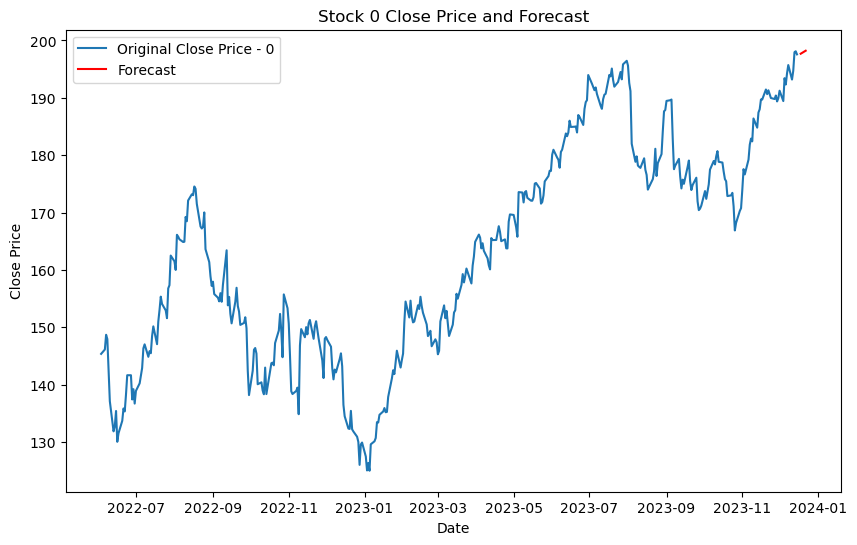


Stock: 1
ADF Statistic: -0.4778535853065343
p-value: 0.896266247286107
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 1 (original scale): 2023-12-29    148.792783
2024-01-01    148.868984
2024-01-02    148.944476
2024-01-03    149.019979
2024-01-04    149.095482
Freq: B, Name: predicted_mean, dtype: float64


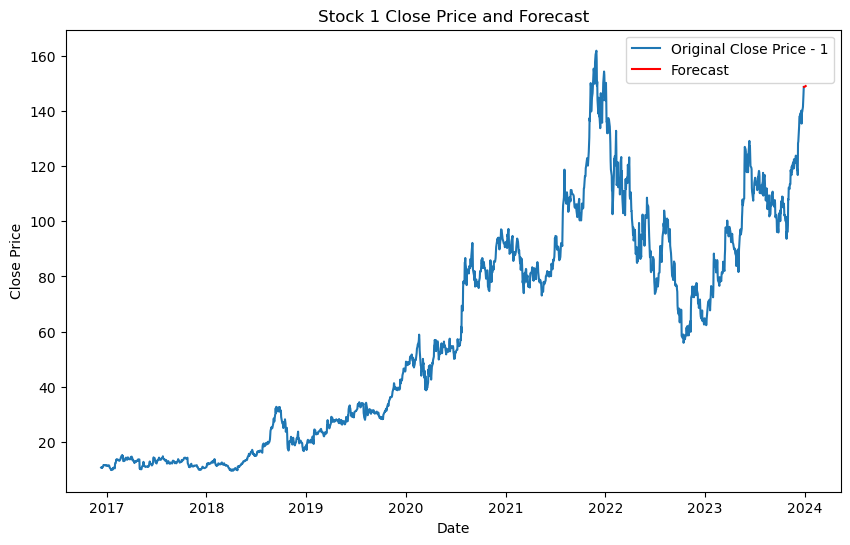


Stock: 2
ADF Statistic: -1.9943575367237745
p-value: 0.28905258983768234
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 2 (original scale): 2023-12-15    256.642224
2023-12-18    256.618282
2023-12-19    256.557482
2023-12-20    256.493494
2023-12-21    256.429231
Freq: B, Name: predicted_mean, dtype: float64


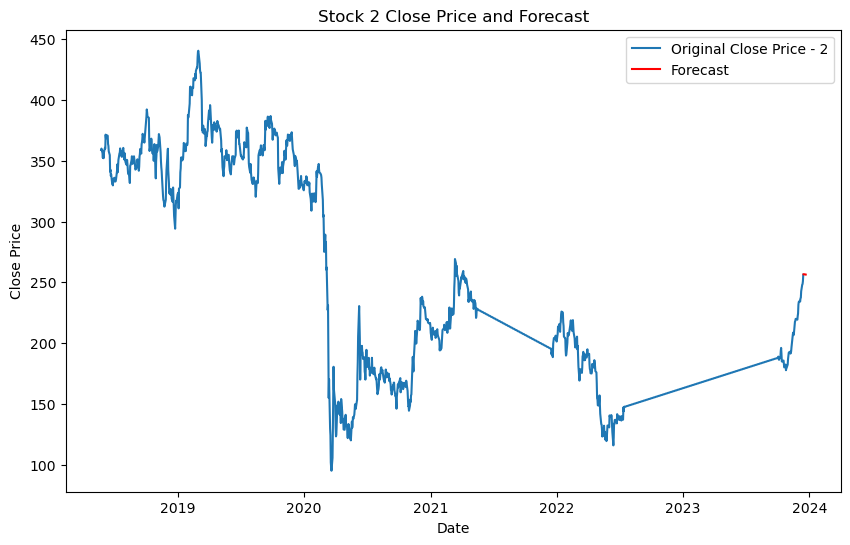


Stock: 3
ADF Statistic: -1.6234059538085268
p-value: 0.47094414265589624
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 3 (original scale): 2023-12-18    133.542717
2023-12-19    132.928674
2023-12-20    132.207578
2023-12-21    131.450301
2023-12-22    130.680797
Freq: B, Name: predicted_mean, dtype: float64


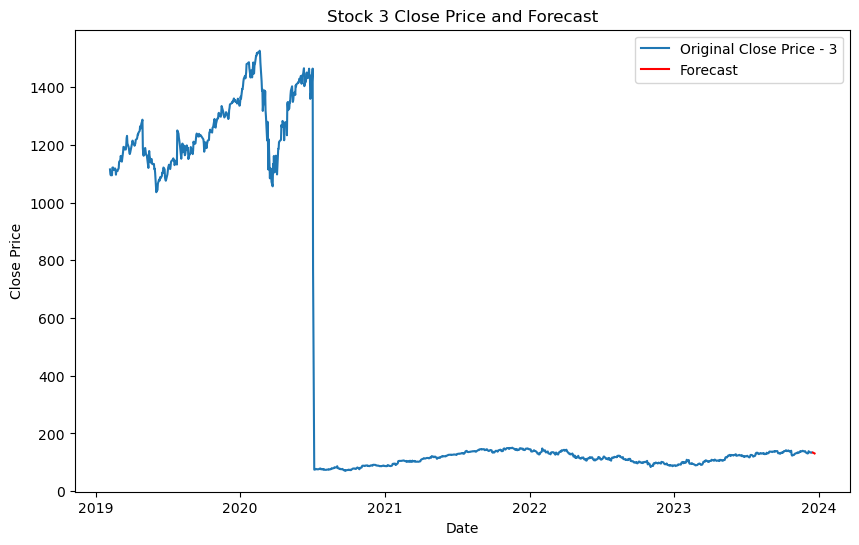


Stock: 4
ADF Statistic: -2.013791805911544
p-value: 0.2805588055786458
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 4 (original scale): 2023-12-18    46.004916
2023-12-19    46.029524
2023-12-20    46.025685
2023-12-21    46.026350
2023-12-22    46.026302
Freq: B, Name: predicted_mean, dtype: float64


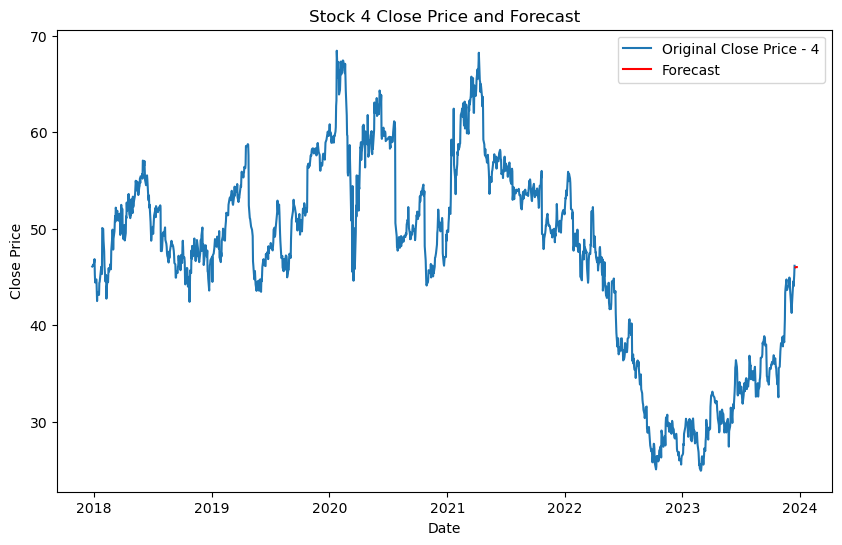


Stock: 5
ADF Statistic: -0.6554411488132335
p-value: 0.8579562527157163
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 5 (original scale): 2023-12-15    105.827210
2023-12-18    105.843004
2023-12-19    105.862793
2023-12-20    105.882815
2023-12-21    105.902851
Freq: B, Name: predicted_mean, dtype: float64


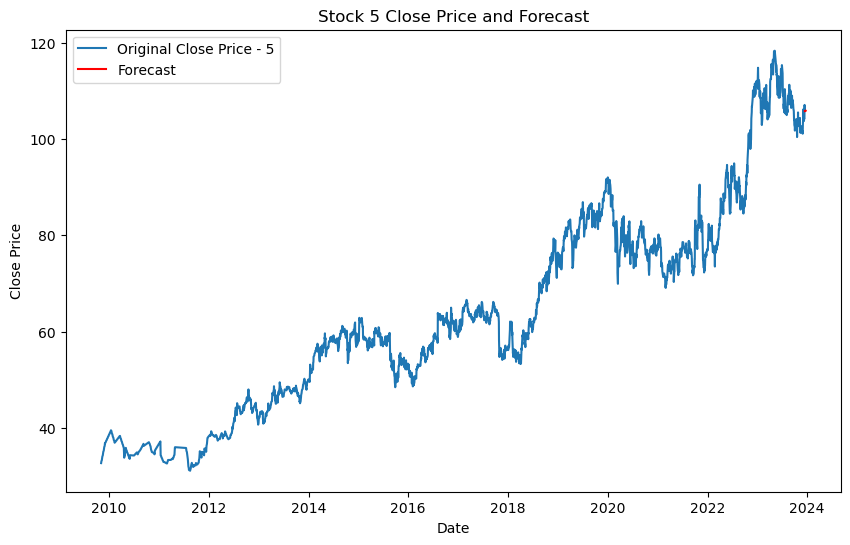


Stock: 6
ADF Statistic: -0.26154083682235074
p-value: 0.9307774399980246
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 6 (original scale): 2023-12-18    370.935020
2023-12-19    371.169963
2023-12-20    371.404711
2023-12-21    371.639461
2023-12-22    371.874210
Freq: B, Name: predicted_mean, dtype: float64


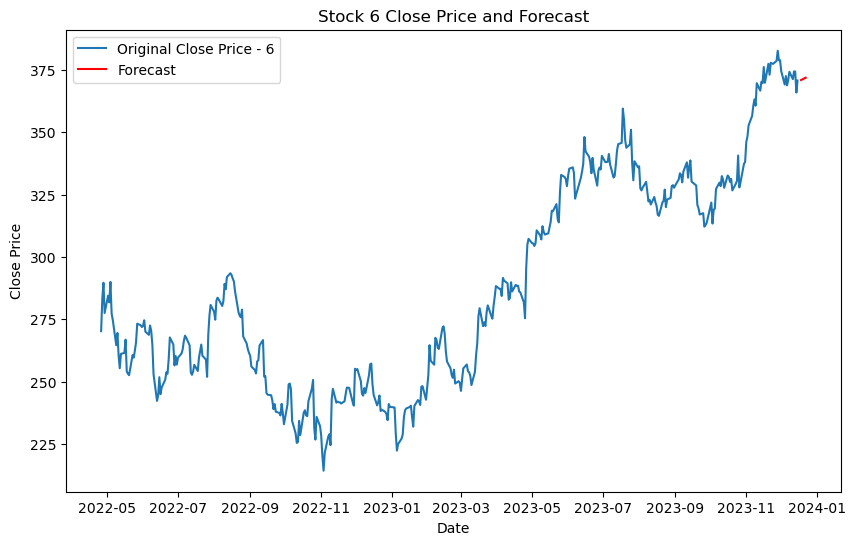


Stock: 7
ADF Statistic: -0.08448621625891008
p-value: 0.9509620100662124
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 7 (original scale): 2023-12-18    489.772714
2023-12-19    490.610303
2023-12-20    491.447620
2023-12-21    492.284934
2023-12-22    493.122248
Freq: B, Name: predicted_mean, dtype: float64


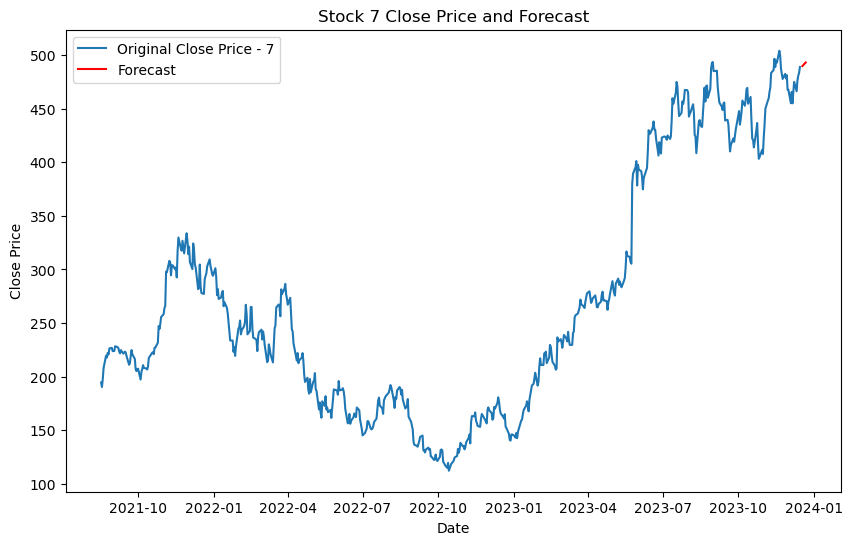


Stock: 8
ADF Statistic: -2.1761198900673513
p-value: 0.21502642413675843
The series is non-stationary. Differencing will be applied.

Forecasted values for stock 8 (original scale): 2023-12-18    253.446407
2023-12-19    253.452300
2023-12-20    253.456779
2023-12-21    253.461292
2023-12-22    253.465804
Freq: B, Name: predicted_mean, dtype: float64


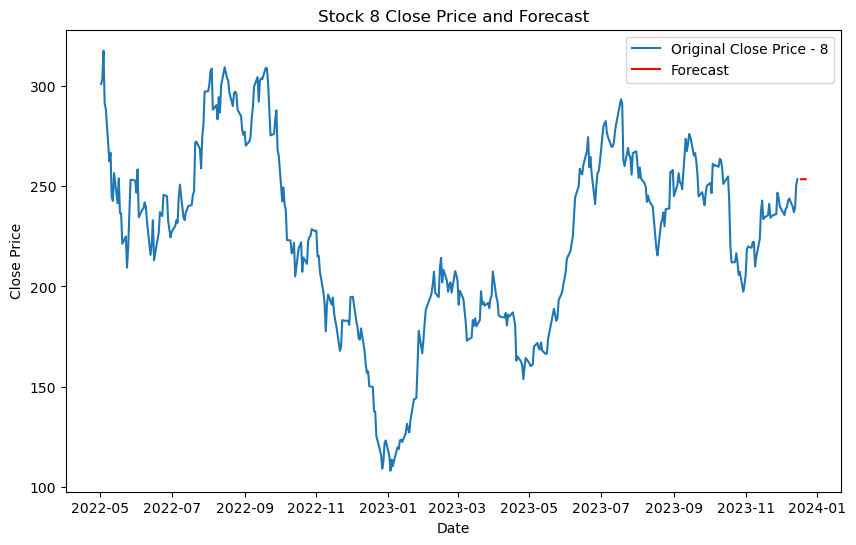

In [71]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


df = df_combined.copy()
df['date'] = pd.to_datetime(df['date'])

# Step 1: Split the DataFrame by 'Stock_symbol'
grouped = df.groupby('Stock_symbol')

# Dictionary to store forecasts for each stock
forecasts = {}

# Step 2: Apply ARIMA separately for each stock
for stock, stock_df in grouped:
    stock_df = stock_df.set_index('date').asfreq('B')  # Set date as index and fill missing dates
    
    # Interpolate missing 'close' values for continuous time series
    stock_df['close'] = stock_df['close'].interpolate(method='linear')

    # Check for stationarity and difference if necessary
    result = adfuller(stock_df['close'].dropna())
    print(f'\nStock: {stock}')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    
    if result[1] > 0.05:
        print("The series is non-stationary. Differencing will be applied.")
        stock_df['close_diff'] = stock_df['close'].diff().dropna()  # First-order differencing
        model_data = stock_df['close_diff'].dropna()
        use_diff = True
    else:
        model_data = stock_df['close']
        use_diff = False

    # Step 3: Fit the ARIMA model and forecast
    model = ARIMA(model_data, order=(1, 1, 1))  # Adjust order based on ACF/PACF if needed
    model_fit = model.fit()
    
    # Step 4: Forecast and revert differencing if needed
    forecast = model_fit.forecast(steps=5)  # Forecast 5 future values
    
    if use_diff:
        # Reverse differencing to get back to the original scale
        last_close = stock_df['close'].iloc[-1]
        forecast = forecast.cumsum() + last_close  # Revert differencing
    forecasts[stock] = forecast
    print(f"\nForecasted values for stock {stock} (original scale):", forecast)

    # Plot original data and forecast
    plt.figure(figsize=(10, 6))
    plt.plot(stock_df['close'], label=f'Original Close Price - {stock}')
    plt.plot(forecast.index, forecast, label='Forecast', color='red')
    plt.title(f'Stock {stock} Close Price and Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()


